In [1]:
# imports
import numpy as np                     # numeric python lib

import matplotlib.image as mpimg       # reading images to numpy arrays
import matplotlib.pyplot as plt        # to plot any graph
import matplotlib.patches as mpatches  # to draw a circle at the mean contour

from skimage import measure            # to find shape contour
import scipy.ndimage as ndi            # to determine shape centrality


# matplotlib setup
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)      # setting default size of plots

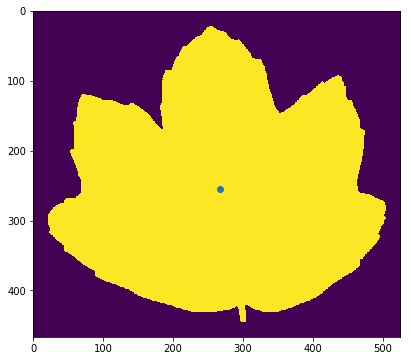

In [10]:
# reading an image file using matplotlib into a numpy array
# good ones: 11, 19, 23, 27, 48, 53, 78, 218
# img = mpimg.imread('../rawdata/images/163.jpg')
img = mpimg.imread('../rawdata/images/1.jpg')

# using image processing module of scipy to find the center of the leaf
cy, cx = ndi.center_of_mass(img)

plt.imshow(img)  # show me the leaf
plt.scatter(cx, cy)           # show me its center
plt.show()

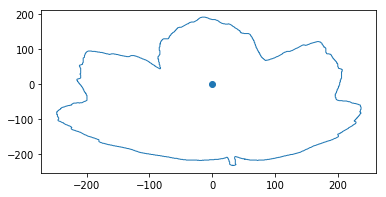

In [3]:
# scikit-learn imaging contour finding, returns a list of found edges
contours = measure.find_contours(img, .8)

# from which we choose the longest one
contour = max(contours, key=len)
contour[::,1] -= cx  # demean X
contour[::,0] -= cy  # demean Y
f = plt.figure(figsize=(6,3))
plt.scatter(0, 0)
# let us see the contour that we hopefully found
plt.plot(contour[::,-1], max(contour[::,0])+min(contour[::,0])-contour[::,0], linewidth=1)  # (I will explain this [::,x] later)
# plt.imshow(img, cmap='Set3')
# plt.imshow(img)
plt.show()

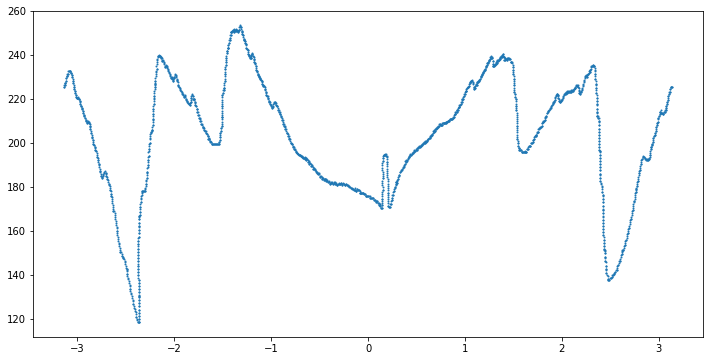

In [4]:
# cartesian to polar coordinates, just as the image shows above
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return [rho, phi]

# just calling the transformation on all pairs in the set
polar_contour = np.array([cart2pol(x, y) for x, y in contour])
f = plt.figure(figsize=(12,6))
# and plotting the result
plt.scatter(polar_contour[::,1], polar_contour[::,0], 1)
plt.show()

In [5]:
contour[::,1] -= cx  # demean X
contour[::,0] -= cy  # demean Y

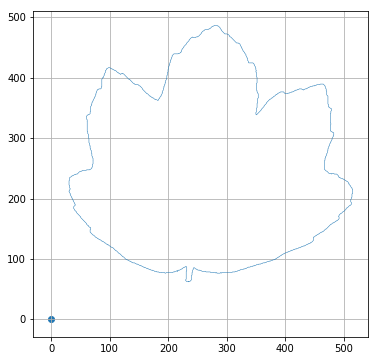

In [6]:
# checking if we succeeded to move the center to (0,0)
plt.plot(-contour[::,1], -contour[::,0], linewidth=0.5)
plt.grid()
plt.scatter(0, 0)
plt.show()

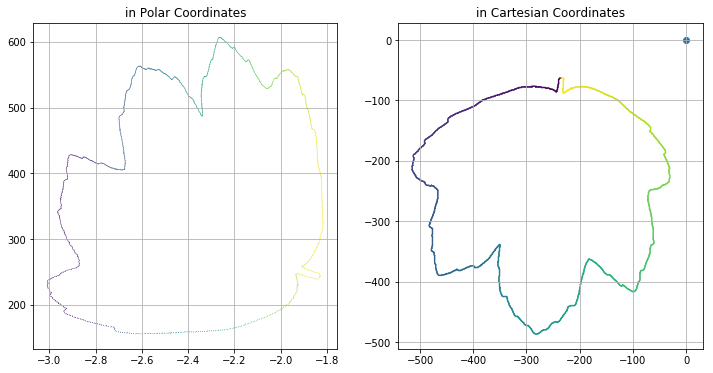

In [7]:
# just calling the transformation on all pairs in the set
polar_contour = np.array([cart2pol(x, y) for x, y in contour])

# and plotting the result
rcParams['figure.figsize'] = (12, 6)
plt.subplot(121)
plt.scatter(polar_contour[::,1], polar_contour[::,0], linewidth=0, s=.5, c=polar_contour[::,1])
plt.title('in Polar Coordinates')
plt.grid()
plt.subplot(122)
plt.scatter(contour[::,1],             # x axis is radians
            contour[::,0],             # y axis is distance from center
            linewidth=0, s=2,          # small points, w/o borders
            c=range(len(contour)))     # continuous coloring (so that plots match)
plt.scatter(0, 0)
plt.title('in Cartesian Coordinates')
plt.grid()
plt.show()

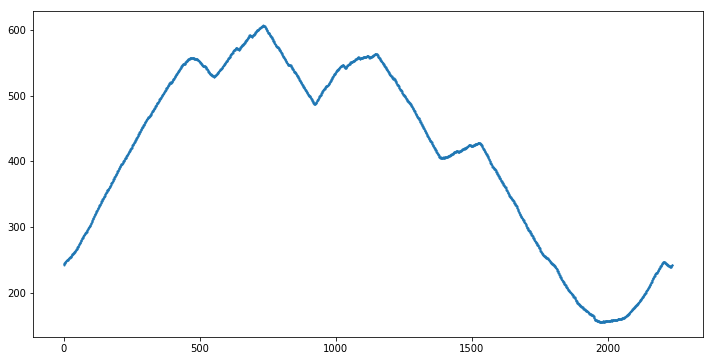

In [8]:
plt.scatter(range(len(polar_contour[::,0])),polar_contour[::,0],1)

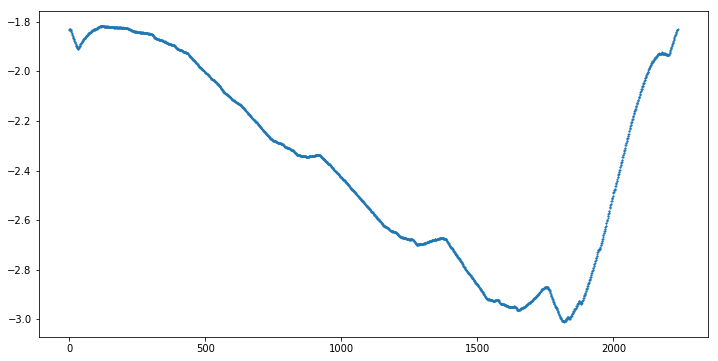

In [9]:
plt.scatter(range(len(polar_contour[::,0])),polar_contour[::,1],1)